In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_c = pd.read_csv('Clusters_Clientes_KM.csv')
df_c

,Cliente,KG,Precio_Unit_Venta,Ganancia_USD,Ganancia_MXN,Costo_Unit_Manufactura,lbs,Costo_Tot_Manufactura,pca1,pca2,cluster
0,1,5399.0,4094.36,42496.00,816789.32,2559.95,11902.0955,491796.17,-0.637993,-0.170813,2
1,2,1923.0,7182.77,35754.40,649150.79,3169.48,4239.2535,321781.87,-0.666888,-0.186961,2
2,3,60500.0,586.71,138255.00,2654764.62,533.02,133372.2496,2411309.79,0.242013,-0.146453,2
3,4,51496.0,4756.88,270176.60,5248130.06,3219.81,113522.9320,3581450.13,0.438514,-0.097625,2
4,5,66800.0,40559.83,630345.06,12143551.40,27189.82,147260.6000,8109220.99,2.021976,-0.215646,3
...,...,...,...,...,...,...,...,...,...,...,...
140,152,5650.0,1565.18,17783.00,344812.68,1235.29,12455.4250,275278.10,-0.719242,-0.166719,2
141,153,3265.0,563.84,254404.00,254404.00,475.77,7197.6925,219588.18,-0.752573,-0.015281,2
142,154,8920.0,16006.14,1755670.25,1755670.25,10608.02,19664.1400,1313668.87,-0.082380,0.740198,2
143,155,3375.0,10011.62,60445.00,1160469.84,8152.23,7440.1875,935536.63,-0.478510,-0.221476,2


In [3]:
df_c.dtypes

Cliente                     int64
KG                        float64
Precio_Unit_Venta         float64
Ganancia_USD              float64
Ganancia_MXN              float64
Costo_Unit_Manufactura    float64
lbs                       float64
Costo_Tot_Manufactura     float64
pca1                      float64
pca2                      float64
cluster                     int64
dtype: object

In [4]:
df_c.groupby('cluster')[['KG','Ganancia_MXN']].describe().T.round(2)

cluster                       0            1            2            3
KG           count         3.00         1.00       129.00        12.00
             mean      60686.33    485953.00     10227.14    165670.50
             std       14808.86          NaN     17677.76     77893.38
             min       48000.00    485953.00        25.00     66800.00
             25%       52550.00    485953.00       357.00    104521.25
             50%       57100.00    485953.00      2025.00    145976.00
             75%       67029.50    485953.00      9244.00    195531.00
             max       76959.00    485953.00     82752.00    319820.00
Ganancia_MXN count         3.00         1.00       129.00        12.00
             mean   10746634.52  77759354.36   1230144.65  15199498.35
             std     3117225.50          NaN   2422733.82  11575165.85
             min     8717095.95  77759354.36      1787.04   4961870.42
             25%     8952021.78  77759354.36     72874.31   8255218.66
             50%     9186947.62  77759354.36    254404.00  12689786.49
             75%    11761403.81  77759354.36   1169221.73  15976534.11
             max    14335860.00  77759354.36  20590298.00  48907335.25

In [5]:
df_c.groupby('cluster')[['Precio_Unit_Venta','Costo_Unit_Manufactura']].describe().T.round(2)

cluster                              0          1         2         3
Precio_Unit_Venta      count      3.00       1.00    129.00     12.00
                       mean   29388.49  492409.22   3962.81  12759.39
                       std    38430.62        NaN   7867.81  15817.30
                       min     3278.63  492409.22     58.27   1169.62
                       25%     7323.82  492409.22    406.87   1881.36
                       50%    11369.01  492409.22   1224.28   4635.02
                       75%    42443.42  492409.22   3162.79  17558.05
                       max    73517.83  492409.22  65142.97  43891.09
Costo_Unit_Manufactura count      3.00       1.00    129.00     12.00
                       mean   21466.80  330280.31   2543.99   7461.36
                       std    29370.43        NaN   4845.45   9798.20
                       min      658.48  330280.31      0.00    984.01
                       25%     4668.57  330280.31    292.93   1524.14
                       50%     8678.67  330280.31    764.70   3360.97
                       75%    31870.96  330280.31   2286.15   6114.63
                       max    55063.25  330280.31  38996.74  28371.83

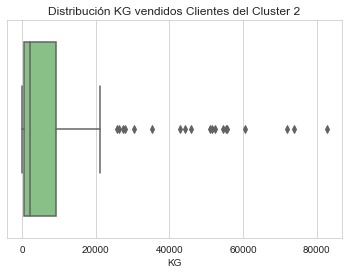

In [6]:
df_c2= df_c.drop(df_c[df_c['cluster'] != 2].index)
df_c2 = df_c2.reset_index(drop=True)

box_c2_KG = sns.boxplot(x = df_c2['KG'], palette = "Accent")
box_c2_KG.set(xlabel = 'KG', title = 'Distribución KG vendidos Clientes del Cluster 2');

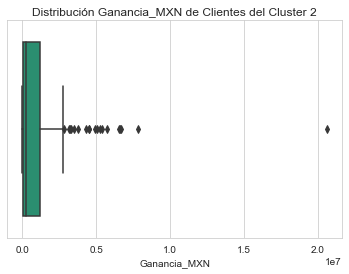

In [7]:
box_c2_GMXN = sns.boxplot(x = df_c2['Ganancia_MXN'], palette = "Dark2")
box_c2_GMXN.set(xlabel = 'Ganancia_MXN', title = 'Distribución Ganancia_MXN de Clientes del Cluster 2');

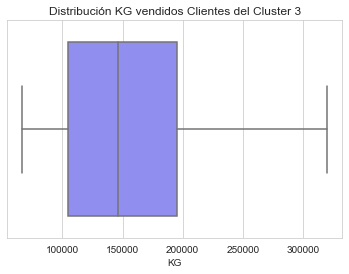

In [8]:
df_c3= df_c.drop(df_c[df_c['cluster'] != 3].index)
df_c3 = df_c3.reset_index(drop=True)
#df_c3_no_outlyer_KG = df_c3[df_c3['KG'] < 400000]

box_c3_KG = sns.boxplot(x = df_c3['KG'], palette = "cool")
box_c3_KG.set(xlabel = 'KG', title = 'Distribución KG vendidos Clientes del Cluster 3');

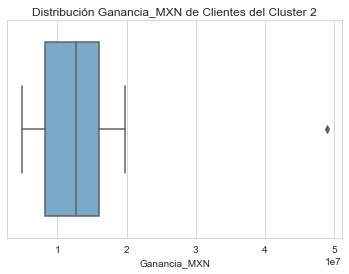

In [9]:
#df_c3_no_outlyer_GMXN = df_c3[df_c3['Ganancia_MXN'] < 30000000]
box_c3_GMXN = sns.boxplot(x = df_c3['Ganancia_MXN'], palette = "Blues_r")
box_c3_GMXN.set(xlabel = 'Ganancia_MXN', title = 'Distribución Ganancia_MXN de Clientes del Cluster 2');

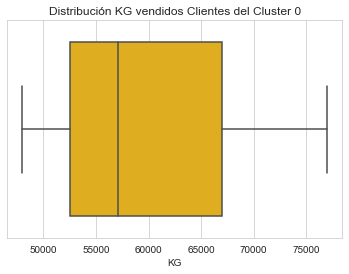

In [10]:
df_c0= df_c.drop(df_c[df_c['cluster'] != 0].index)
df_c0 = df_c0.reset_index(drop=True)
#df_c3_no_outlyer_KG = df_c3[df_c3['KG'] < 70000]

box_c0_KG = sns.boxplot(x = df_c0['KG'], palette = "Wistia")
box_c0_KG.set(xlabel = 'KG', title = 'Distribución KG vendidos Clientes del Cluster 0');

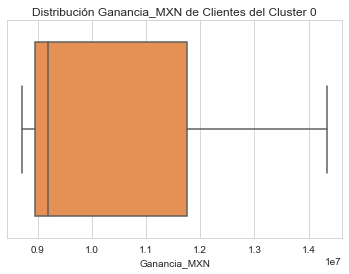

In [11]:
#df_c3_no_outlyer_GMXN = df_c3[df_c3['Ganancia_MXN'] < 20000000]
box_c0_GMXN = sns.boxplot(x = df_c0['Ganancia_MXN'], palette = "Oranges")
box_c0_GMXN.set(xlabel = 'Ganancia_MXN', title = 'Distribución Ganancia_MXN de Clientes del Cluster 0');

In [12]:
df_0 = df_c[df_c['cluster'] == 0]
df_0 = df_0.reset_index(drop=True)
df_0 = df_0[['cluster','Cliente']]
df_0

,cluster,Cliente
0,0,47
1,0,118
2,0,140


In [13]:
df_1 = df_c[df_c['cluster'] == 1]
df_1 = df_1.reset_index(drop=True)
df_1 = df_1[['cluster','Cliente']]
df_1

,cluster,Cliente
0,1,6


In [14]:
df_2 = df_c[df_c['cluster'] == 2]
df_2 = df_2.reset_index(drop=True)
df_2 = df_2[['cluster','Cliente']]
df_2

,cluster,Cliente
0,2,1
1,2,2
2,2,3
3,2,4
4,2,8
...,...,...
124,2,152
125,2,153
126,2,154
127,2,155


In [15]:
df_3 = df_c[df_c['cluster'] == 3]
df_3 = df_3.reset_index(drop=True)
df_3 = df_3[['cluster','Cliente']]
df_3

,cluster,Cliente
0,3,5
1,3,7
2,3,13
3,3,14
4,3,16
5,3,60
6,3,66
7,3,101
8,3,123
9,3,127


#### Gráfica de Porcentajes

(145,)
   y_variable  percentage_count
3           1          0.006897
2           0          0.020690
1           3          0.082759
0           2          0.889655


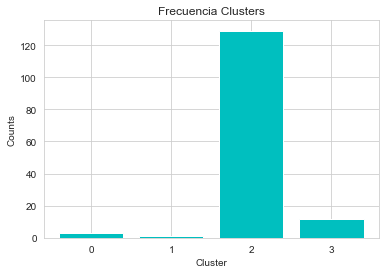

In [16]:
y = df_c['cluster']
print(y.shape)
print(y.value_counts(normalize = True)
      .reset_index().rename(columns = {'index': 'y_variable', 'cluster': 'percentage_count'})
      .sort_values(by = "percentage_count"))
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "c")
plt.title("Frecuencia Clusters")
plt.xlabel("Cluster")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

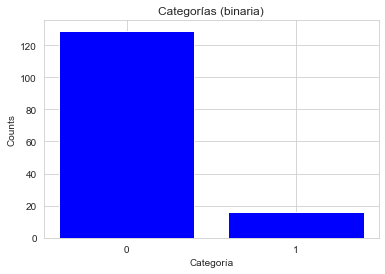

In [17]:
y_binary = np.where(y != 2 , 1, 0 ) # Esta será nuestra nueva variable objetivo.
# Ahora pasamos de un problema de clasificación múltiple a un problema de clasificación binario.

labels, counts = np.unique(y_binary, return_counts=True)
plt.bar(labels, counts, align='center', color = "b")
plt.title("Categorías (binaria)")
plt.xlabel("Categoría")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

In [18]:
df_c_dropped = df_c.drop(columns = ['cluster', 'Cliente','pca1','pca2'], axis = 1)

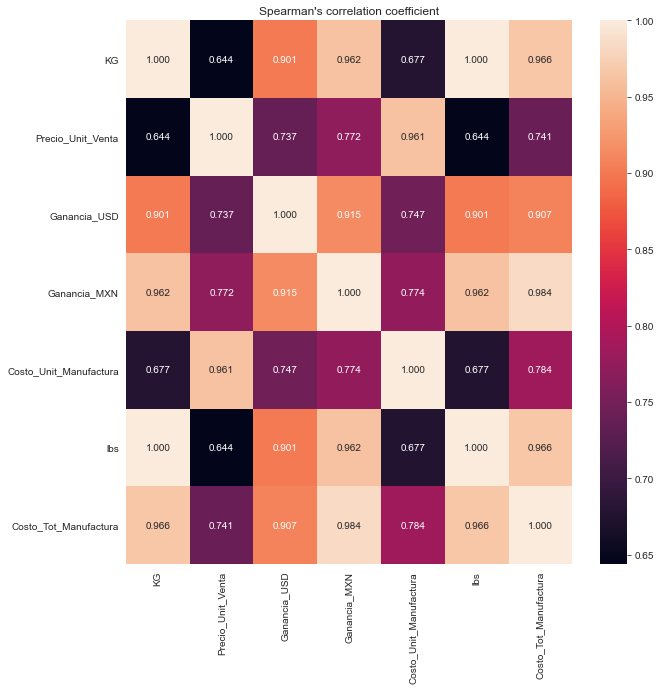

In [19]:
corr_spearman = df_c_dropped.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [21]:
X = df_c_dropped
print(X.shape)
print(X.describe().T.round(2))

(145, 7)
                        count        mean         std      min       25%  \
KG                      145.0    27416.27    63914.15    25.00    525.00   
Precio_Unit_Venta       145.0     8585.45    41831.24    58.27    531.31   
Ganancia_USD            145.0   437629.16  1630203.16    91.25   5456.00   
Ganancia_MXN            145.0  3110909.64  8416995.35  1787.04  80780.87   
Costo_Unit_Manufactura  145.0     5602.70    28038.35     0.00    367.86   
lbs                     145.0    60439.16   140898.75    55.11   1157.36   
Costo_Tot_Manufactura   145.0  2081930.55  5544473.47     0.00  50577.36   

                              50%         75%          max  
KG                        3500.00    20850.00    485953.00  
Precio_Unit_Venta         1453.29     4094.36    492409.22  
Ganancia_USD             30250.00   230635.68  14335860.00  
Ganancia_MXN            350185.30  2654764.62  77759354.36  
Costo_Unit_Manufactura     966.67     2712.77    330280.31  
lbs             

In [22]:
pt = PowerTransformer()
X_scaled = pt.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%   max
0  145.0   0.0  1.0 -1.90 -0.71  0.06  0.79  2.11
1  145.0  -0.0  1.0 -2.17 -0.60  0.03  0.63  2.85
2  145.0   0.0  0.0  0.00  0.00  0.00  0.00  0.00
3  145.0   0.0  1.0 -2.30 -0.71 -0.08  0.82  2.37
4  145.0   0.0  1.0 -3.80 -0.57 -0.02  0.57  3.42
5  145.0   0.0  1.0 -1.91 -0.71  0.05  0.79  2.11
6  145.0   0.0  1.0 -3.26 -0.73 -0.08  0.78  2.69


### Aprendizaje Supervisado

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size = 0.25, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 108
y_train shape: 108
X_test shape:37
y_test shape:37


In [24]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc.round(2))+"%")
    print("Sensibilidad:"+str(sen.round(2))+"%")
    print("Especificidad:"+str(spec.round(2))+"%")

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier() #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
y_pred_knn = KNN.predict(X_test)   #Genera la predicción
evaluar(y_test, y_pred_knn)

[[35  1]
 [ 0  1]]
True positives: 1
True negatives: 35
False positives: 1
False negative: 0
Precision:97.3%
Sensibilidad:100.0%
Especificidad:97.22%


In [26]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.98
Precisión del modelo en el subconjunto de prueba: 0.97


In [27]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_nb)

[[34  2]
 [ 0  1]]
True positives: 1
True negatives: 34
False positives: 2
False negative: 0
Precision:94.59%
Sensibilidad:100.0%
Especificidad:94.44%


In [28]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.93
Precisión del modelo en el subconjunto de prueba: 0.95


In [29]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_lr)

[[35  1]
 [ 0  1]]
True positives: 1
True negatives: 35
False positives: 1
False negative: 0
Precision:97.3%
Sensibilidad:100.0%
Especificidad:97.22%


In [30]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.97


In [31]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train) #Entrena el modelo
y_pred_svc = SVC.predict(X_test) #Genera la predición
evaluar(y_test, y_pred_svc)

[[36  0]
 [ 0  1]]
True positives: 1
True negatives: 36
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


In [32]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.98
Precisión del modelo en el subconjunto de prueba: 1.0


In [33]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train) #Entrena el modelo
y_pred_rfc = RFC.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_rfc)

[[35  1]
 [ 0  1]]
True positives: 1
True negatives: 35
False positives: 1
False negative: 0
Precision:97.3%
Sensibilidad:100.0%
Especificidad:97.22%


In [34]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.97


In [35]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier()
ANN.fit(X_train, y_train)
y_pred_ann = ANN.predict(X_test)
evaluar(y_test, y_pred_ann)

[[35  1]
 [ 0  1]]
True positives: 1
True negatives: 35
False positives: 1
False negative: 0
Precision:97.3%
Sensibilidad:100.0%
Especificidad:97.22%


In [36]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.96
Precisión del modelo en el subconjunto de prueba: 0.97
